In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize as NormColor
from tqdm.notebook import tqdm
sys.path.append(".")
import HOD as HOD
import HOD_spline as HOD_spline
from astropy.cosmology import Planck15
cosmo = Planck15 #FlatLambdaCDM(H0=67.74, Om0=0.3089, Tcmb0=2.725)
h = cosmo.H(0).value/100
LOW_RES = True

M_min, M_sat = 10**12.09, 10**13.73
sigma_logM, alpha = 0.2, 1.0
SHOW_HALO_TERMS = 1

def read_Nico_data(fname):
    data = pd.read_csv(fname, sep=' ')
    bin_centre = data['theta_bin'].to_numpy()
    w_obs = data['w_theta'].to_numpy()
    w_err = data['err_w_theta'].to_numpy()
    z_array = data['z_array'].to_numpy()
    Nz = data['Nz'].to_numpy()
    z_array, Nz = z_array[z_array>0], Nz[z_array>0]
    N_norm = Nz / (np.sum(Nz) * np.diff(z_array)[0])
    return bin_centre, w_obs, w_err, z_array, N_norm

fnames = ['ACF_new_parameters_z5.5.txt',
          'ACF_new_parameters_z6.5.txt',
          'ACF_new_parameters_z7.4.txt',
          'ACF_new_parameters_z8.5.txt',
          'ACF_new_parameters_z9.3.txt',
          'ACF_new_parameters_z10.6.txt',
          'ACF_new_parameters_z11.5.txt']

fname = fnames[0]
bin_centre, w_obs, w_err, z_array, N_norm = read_Nico_data('Data_Nico/'+fname)
t_Nico = bin_centre/206265
chi2_best, M_sat_best, M_min_best = np.infty, M_sat, M_min

/var/folders/wk/scnpc33x3q348qw83nb1tcgw0000gn/T/ipykernel_83541/1819928905.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


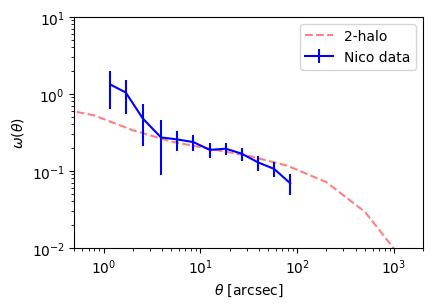

CPU times: user 1.3 s, sys: 1.64 s, total: 2.94 s
Wall time: 653 ms


In [2]:
%%time
fig, ax = plt.subplots(1, 1, figsize=(4.5, 3), sharex=False, sharey=False)
th_arr = np.logspace(-0.5, 3.5, 11)/206265
# o1_N_spl = HOD_spline.omega_1halo_singleCore(th_arr, M_min_best, sigma_logM, M_sat_best, alpha, N_norm, z_array, LOW_RES=LOW_RES, mag_min = -22.3, mag_max = -15.5)
o2_N_spl = HOD_spline.omega_2halo_singleCore(th_arr, M_min_best, sigma_logM, M_sat_best, alpha, N_norm, z_array, LOW_RES=LOW_RES, mag_min = -22.3, mag_max = -15.5)
# ax.plot(th_arr*206265, o1_N_spl+o2_N_spl, c = 'darkorange', ls = '-')
# ax.plot(th_arr*206265, o1_N_spl, c = 'm', ls = '--', alpha = 0.5, label='1-halo')
ax.plot(th_arr*206265, o2_N_spl, c = 'r', ls = '--', alpha = 0.5, label='2-halo')
ax.errorbar(bin_centre,w_obs, w_err, c='b', label='Nico data')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim((0.5,2e3))
ax.set_ylim((1e-2, 1e1))
ax.set_xlabel(r'$\theta$ [arcsec]')
ax.set_ylabel(r'$\omega$($\theta$)')
plt.legend()
plt.show()

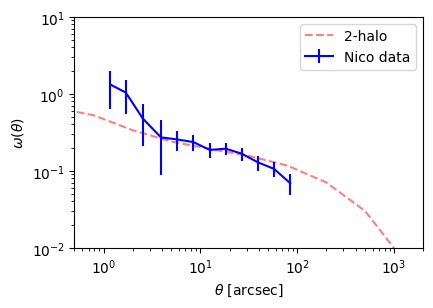

CPU times: user 2.35 s, sys: 112 ms, total: 2.46 s
Wall time: 2.16 s


In [3]:
%%time
fig, ax = plt.subplots(1, 1, figsize=(4.5, 3), sharex=False, sharey=False)
th_arr = np.logspace(-0.5, 3.5, 11)/206265
# o1_N = HOD.omega_1halo_singleCore(th_arr, M_min_best, sigma_logM, M_sat_best, alpha, N_norm, z_array, LOW_RES=LOW_RES, mag_min = -22.3, mag_max = -15.5)
o2_N = HOD.omega_2halo_singleCore(th_arr, M_min_best, sigma_logM, M_sat_best, alpha, N_norm, z_array, LOW_RES=LOW_RES, mag_min = -22.3, mag_max = -15.5)
# ax.plot(th_arr*206265, o1_N+o2_N, c = 'darkorange', ls = '-')
# ax.plot(th_arr*206265, o1_N, c = 'm', ls = '--', alpha = 0.5, label='1-halo')
ax.plot(th_arr*206265, o2_N, c = 'r', ls = '--', alpha = 0.5, label='2-halo')
ax.errorbar(bin_centre,w_obs, w_err, c='b', label='Nico data')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim((0.5,2e3))
ax.set_ylim((1e-2, 1e1))
ax.set_xlabel(r'$\theta$ [arcsec]')
ax.set_ylabel(r'$\omega$($\theta$)')
plt.legend()
plt.show()